<a href="https://colab.research.google.com/github/ryanpseely/reu_nsf/blob/main/reu_nsf_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSF Awards & Political Interference

Analysis of how politics may interfere with the type and amount of awards given by the NSF to researchers

Note on GitHub syncing: Using Colab with GitHub is NOT like RMarkdown files and GitHub Desktop. To "push" changes to GitHub, I must do the following steps...
1. File > Save a copy in GitHub
2. Choose the reu_nsf repository
3. Write a commit message
4. Click "OK" when ready to commit the changes.

## Merging, Cleaning, Exploring Data

In [ ]:
import pandas as pd

In [ ]:
# Data set stored in GitHub: Import into a Pandas data frame
# Changed the URL to point to the raw CSV data instead of the GitHub page
csv_file_24 = "https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/Awards_JanMar24.csv"

award_data_24 = pd.read_csv(csv_file_24, encoding='latin1')

csv_file_25 = "https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/Awards_JanMar25.csv"

award_data_25 = pd.read_csv(csv_file_25, encoding='latin1')

In [ ]:
award_data_24.columns # Show the list of variables in the file

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract'],
      dtype='object')

In [ ]:
award_data_25.columns

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract'],
      dtype='object')

In [ ]:
print(len(award_data_24))
print(len(award_data_25))

1225
788


In [ ]:
award_data_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AwardNumber              1225 non-null   int64 
 1   Title                    1225 non-null   object
 2   NSFOrganization          1225 non-null   object
 3   Program(s)               1225 non-null   object
 4   StartDate                1225 non-null   object
 5   LastAmendmentDate        1225 non-null   object
 6   PrincipalInvestigator    1225 non-null   object
 7   State                    1225 non-null   object
 8   Organization             1225 non-null   object
 9   AwardInstrument          1225 non-null   object
 10  ProgramManager           1225 non-null   object
 11  EndDate                  1225 non-null   object
 12  AwardedAmountToDate      1225 non-null   object
 13  Co-PIName(s)             368 non-null    object
 14  PIEmailAddress           1225 non-null  

In [ ]:
award_data_24.head()

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationStreet,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract
0,2348998,Collaborative Research: REU Site: Earth and Pl...,EAR,"SPECIAL PROGRAMS IN ASTRONOMY, EDUCATION AND H...",03/01/2025,02/28/2024,Denton Ebel,NY,American Museum Natural History,Standard Grant,...,200 CENTRAL PARK W,NEW YORK,NY,100245102,2127695975,GEO,"121900, 157500","1206, 1207, 7736, 9178, 9250, SMET",$0.00,This award provides renewed funding for underg...
1,2348999,Collaborative Research: REU Site: Earth and Pl...,EAR,EDUCATION AND HUMAN RESOURCES,03/01/2025,02/28/2024,Timothy Paglione,NY,CUNY Graduate School University Center,Standard Grant,...,365 5TH AVE STE 8113,NEW YORK,NY,100164309,2128177526,GEO,157500,9250,$0.00,This award provides renewed funding for underg...
2,2400789,SHINE: The Evolution of Coronal Dimmings and T...,AGS,SOLAR-TERRESTRIAL,01/01/2025,02/05/2024,Larisza Krista,CO,University of Colorado at Boulder,Continuing Grant,...,3100 MARINE ST,Boulder,CO,803090001,3034926221,GEO,152300,NaN,$0.00,Coronal mass ejections (CMEs) are colossal pla...
3,2338139,CAREER: Balancing the global alkalinity cycle ...,EAR,"Hydrologic Sciences, Geobiology & Low-Temp Geo...",01/01/2025,02/29/2024,Mark Torres,TX,William Marsh Rice University,Continuing Grant,...,6100 MAIN ST,Houston,TX,770051827,7133484820,GEO,"157900, 729500",1045,$0.00,The water flowing in a river today is largely ...
4,2348995,REU Site: Community-Soil-Air-Water: A Geoscien...,EAR,EDUCATION AND HUMAN RESOURCES,11/01/2024,12/16/2024,Flavia Dias de Souza Moraes,GA,"Georgia State University Research Foundation, ...",Standard Grant,...,58 EDGEWOOD AVE NE,ATLANTA,GA,303032921,4044133570,GEO,157500,9250,$0.00,Georgia State University will host the Communi...


In [ ]:
# Remove commas, dollar signs
award_data_24['AwardedAmountToDate'] = award_data_24['AwardedAmountToDate'].str.replace('[\$,]', '', regex=True)
award_data_25['AwardedAmountToDate'] = award_data_25['AwardedAmountToDate'].str.replace('[\$,]', '', regex=True)


In [ ]:
award_data_25['AwardedAmountToDate'].head()

,AwardedAmountToDate
0,190000.00
1,85950.00
2,190000.00
3,110000.00
4,110000.00


In [ ]:
award_data_24['AwardedAmountToDate'].head()

,AwardedAmountToDate
0,425132.00
1,39206.00
2,223476.00
3,211792.00
4,393759.00


In [ ]:
# Add year columns for the original award year
award_data_24['Year'] = '24'
award_data_25['Year'] = '25'

In [ ]:
# Glue datasets together
awards = pd.concat([award_data_24, award_data_25], ignore_index=True)

In [ ]:
awards.head()

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract,Year
0,2348998,Collaborative Research: REU Site: Earth and Pl...,EAR,"SPECIAL PROGRAMS IN ASTRONOMY, EDUCATION AND H...",03/01/2025,02/28/2024,Denton Ebel,NY,American Museum Natural History,Standard Grant,...,NEW YORK,NY,100245102,2.127696e+09,GEO,"121900, 157500","1206, 1207, 7736, 9178, 9250, SMET",$0.00,This award provides renewed funding for underg...,24
1,2348999,Collaborative Research: REU Site: Earth and Pl...,EAR,EDUCATION AND HUMAN RESOURCES,03/01/2025,02/28/2024,Timothy Paglione,NY,CUNY Graduate School University Center,Standard Grant,...,NEW YORK,NY,100164309,2.128178e+09,GEO,157500,9250,$0.00,This award provides renewed funding for underg...,24
2,2400789,SHINE: The Evolution of Coronal Dimmings and T...,AGS,SOLAR-TERRESTRIAL,01/01/2025,02/05/2024,Larisza Krista,CO,University of Colorado at Boulder,Continuing Grant,...,Boulder,CO,803090001,3.034926e+09,GEO,152300,NaN,$0.00,Coronal mass ejections (CMEs) are colossal pla...,24
3,2338139,CAREER: Balancing the global alkalinity cycle ...,EAR,"Hydrologic Sciences, Geobiology & Low-Temp Geo...",01/01/2025,02/29/2024,Mark Torres,TX,William Marsh Rice University,Continuing Grant,...,Houston,TX,770051827,7.133485e+09,GEO,"157900, 729500",1045,$0.00,The water flowing in a river today is largely ...,24
4,2348995,REU Site: Community-Soil-Air-Water: A Geoscien...,EAR,EDUCATION AND HUMAN RESOURCES,11/01/2024,12/16/2024,Flavia Dias de Souza Moraes,GA,"Georgia State University Research Foundation, ...",Standard Grant,...,ATLANTA,GA,303032921,4.044134e+09,GEO,157500,9250,$0.00,Georgia State University will host the Communi...,24


In [ ]:
awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardNumber              2013 non-null   int64  
 1   Title                    2013 non-null   object 
 2   NSFOrganization          2013 non-null   object 
 3   Program(s)               2013 non-null   object 
 4   StartDate                2013 non-null   object 
 5   LastAmendmentDate        2013 non-null   object 
 6   PrincipalInvestigator    2013 non-null   object 
 7   State                    2007 non-null   object 
 8   Organization             2013 non-null   object 
 9   AwardInstrument          2013 non-null   object 
 10  ProgramManager           2013 non-null   object 
 11  EndDate                  2013 non-null   object 
 12  AwardedAmountToDate      2013 non-null   object 
 13  Co-PIName(s)             563 non-null    object 
 14  PIEmailAddress          

In [ ]:
# How many awarded each year?
print(f"{len(award_data_24)} awards in 2024")
print(f"{len(award_data_25)} awards in 2025")

1225 awards in 2024
788 awards in 2025


In [ ]:
awards['AwardedAmountToDate'] = pd.to_numeric(awards['AwardedAmountToDate'], errors='coerce')
award_data_24['AwardedAmountToDate'] = pd.to_numeric(award_data_24['AwardedAmountToDate'], errors='coerce')
award_data_25['AwardedAmountToDate'] = pd.to_numeric(award_data_25['AwardedAmountToDate'], errors='coerce')


In [ ]:
len(awards)

2013

In [ ]:
awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardNumber              2013 non-null   int64  
 1   Title                    2013 non-null   object 
 2   NSFOrganization          2013 non-null   object 
 3   Program(s)               2013 non-null   object 
 4   StartDate                2013 non-null   object 
 5   LastAmendmentDate        2013 non-null   object 
 6   PrincipalInvestigator    2013 non-null   object 
 7   State                    2007 non-null   object 
 8   Organization             2013 non-null   object 
 9   AwardInstrument          2013 non-null   object 
 10  ProgramManager           2013 non-null   object 
 11  EndDate                  2013 non-null   object 
 12  AwardedAmountToDate      2013 non-null   float64
 13  Co-PIName(s)             563 non-null    object 
 14  PIEmailAddress          

In [ ]:
awards.groupby('Year')['AwardedAmountToDate'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
24,1225.0,545383.895510,1.423114e+06,0.0,205847.0,360000.0,549445.00,19999300.0
25,788.0,366197.935279,6.032374e+05,0.0,99999.0,248478.0,450068.25,9300395.0


In [ ]:
awards['Abstract'].str.len().mean()

np.float64(2772.440854870775)

In [ ]:
award_data_25['Abstract'].str.len().mean()


np.float64(2607.362134688691)

In [ ]:
award_data_24['Abstract'].str.len().mean()


np.float64(2878.4955102040817)

In [ ]:
award_data_24.head()

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract,Year
0,2348998,Collaborative Research: REU Site: Earth and Pl...,EAR,"SPECIAL PROGRAMS IN ASTRONOMY, EDUCATION AND H...",03/01/2025,02/28/2024,Denton Ebel,NY,American Museum Natural History,Standard Grant,...,NEW YORK,NY,100245102,2127695975,GEO,"121900, 157500","1206, 1207, 7736, 9178, 9250, SMET",$0.00,This award provides renewed funding for underg...,24
1,2348999,Collaborative Research: REU Site: Earth and Pl...,EAR,EDUCATION AND HUMAN RESOURCES,03/01/2025,02/28/2024,Timothy Paglione,NY,CUNY Graduate School University Center,Standard Grant,...,NEW YORK,NY,100164309,2128177526,GEO,157500,9250,$0.00,This award provides renewed funding for underg...,24
2,2400789,SHINE: The Evolution of Coronal Dimmings and T...,AGS,SOLAR-TERRESTRIAL,01/01/2025,02/05/2024,Larisza Krista,CO,University of Colorado at Boulder,Continuing Grant,...,Boulder,CO,803090001,3034926221,GEO,152300,NaN,$0.00,Coronal mass ejections (CMEs) are colossal pla...,24
3,2338139,CAREER: Balancing the global alkalinity cycle ...,EAR,"Hydrologic Sciences, Geobiology & Low-Temp Geo...",01/01/2025,02/29/2024,Mark Torres,TX,William Marsh Rice University,Continuing Grant,...,Houston,TX,770051827,7133484820,GEO,"157900, 729500",1045,$0.00,The water flowing in a river today is largely ...,24
4,2348995,REU Site: Community-Soil-Air-Water: A Geoscien...,EAR,EDUCATION AND HUMAN RESOURCES,11/01/2024,12/16/2024,Flavia Dias de Souza Moraes,GA,"Georgia State University Research Foundation, ...",Standard Grant,...,ATLANTA,GA,303032921,4044133570,GEO,157500,9250,$0.00,Georgia State University will host the Communi...,24


In [ ]:
award_data_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardNumber              1225 non-null   int64  
 1   Title                    1225 non-null   object 
 2   NSFOrganization          1225 non-null   object 
 3   Program(s)               1225 non-null   object 
 4   StartDate                1225 non-null   object 
 5   LastAmendmentDate        1225 non-null   object 
 6   PrincipalInvestigator    1225 non-null   object 
 7   State                    1225 non-null   object 
 8   Organization             1225 non-null   object 
 9   AwardInstrument          1225 non-null   object 
 10  ProgramManager           1225 non-null   object 
 11  EndDate                  1225 non-null   object 
 12  AwardedAmountToDate      1225 non-null   float64
 13  Co-PIName(s)             368 non-null    object 
 14  PIEmailAddress          

In [ ]:
# Two sample T-test...Yes! averages are obviously significant different
import numpy as np
from scipy import stats

amount_awarded_24_sample_variance = np.var(award_data_24["AwardedAmountToDate"], ddof=1)

print(amount_awarded_24_sample_variance)

amount_awarded_25_sample_variance = np.var(award_data_25["AwardedAmountToDate"], ddof=1)

print(amount_awarded_25_sample_variance)
# this confirms unequal variances

t_statistic, p_value = stats.ttest_ind(award_data_24['AwardedAmountToDate'], award_data_25['AwardedAmountToDate'], equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(f"Mean of 2024: {award_data_24['AwardedAmountToDate'].mean()}")
print(f"Mean of 2025: {award_data_25['AwardedAmountToDate'].mean()}")
print(f"Sum of 2024: {award_data_24['AwardedAmountToDate'].sum()}") # 668,095,272.0
print(f"Sum of 2025: {award_data_25['AwardedAmountToDate'].sum()}") # 288,563,973.0

2025252096244.062
363895345563.2093
T-statistic: 3.8962095802902303
P-value: 0.00010131245280405962
Mean of 2024: 545383.8955102041
Mean of 2025: 366197.9352791878
Sum of 2024: 668095272.0
Sum of 2025: 288563973.0


## Next Step: Elementary NLP

In [ ]:
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string


# Processing text - remove stopwords, lowercase, etc.

all_stopwords = list(text.ENGLISH_STOP_WORDS)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
all_stopwords[:10]

['since',
 'while',
 'where',
 'against',
 'noone',
 'other',
 'would',
 'during',
 'forty',
 'amongst']

In [ ]:
len(all_stopwords)

318

In [ ]:
vectorizer = CountVectorizer(lowercase=True, stop_words=all_stopwords)

In [ ]:
# how many observations missing the award variable?
awards['Abstract'].isna().sum()

np.int64(1)

In [ ]:
# what does the row missing the abstract look like
awards[awards['Abstract'].isna()]
# So this will be excluded, currently there are 2013 observations, so after dropping there should be 2012

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract,Year
1577,2346787,Conference: San Juan Winter School on Connecto...,IOS,Modulation,03/15/2025,03/12/2025,Andrew Seeds,PR,University of Puerto Rico Medical Sciences Campus,Standard Grant,...,SAN JUAN,PR,009350001,7.877512e+09,BIO,771400,9150,$0.00,NaN,25


In [ ]:
awards = awards.dropna(subset=['Abstract'])
awards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2012 entries, 0 to 2012
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardNumber              2012 non-null   int64  
 1   Title                    2012 non-null   object 
 2   NSFOrganization          2012 non-null   object 
 3   Program(s)               2012 non-null   object 
 4   StartDate                2012 non-null   object 
 5   LastAmendmentDate        2012 non-null   object 
 6   PrincipalInvestigator    2012 non-null   object 
 7   State                    2006 non-null   object 
 8   Organization             2012 non-null   object 
 9   AwardInstrument          2012 non-null   object 
 10  ProgramManager           2012 non-null   object 
 11  EndDate                  2012 non-null   object 
 12  AwardedAmountToDate      2012 non-null   float64
 13  Co-PIName(s)             562 non-null    object 
 14  PIEmailAddress           1973

In [ ]:
# Now remove puncutation and numbers

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

awards['Abstract'] = awards['Abstract'].apply(remove_punctuation)

awards['Abstract'] = awards['Abstract'].str.replace(r'\d+', '', regex=True)

awards['Abstract'] = awards['Abstract'].str.strip().replace(r'\s+', ' ', regex=True)



/tmp/ipython-input-33-254498634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awards['Abstract'] = awards['Abstract'].apply(remove_punctuation)
/tmp/ipython-input-33-254498634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awards['Abstract'] = awards['Abstract'].str.replace(r'\d+', '', regex=True)
/tmp/ipython-input-33-254498634.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
# Lemmatize words
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

awards['Abstract'] = awards['Abstract'].apply(lemmatize_text)

/tmp/ipython-input-34-1242002260.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awards['Abstract'] = awards['Abstract'].apply(lemmatize_text)


In [ ]:
awards_DTM = vectorizer.fit_transform(awards['Abstract'])

In [ ]:
awards_DTM = pd.DataFrame(awards_DTM.toarray())

awards_DTM.columns = vectorizer.get_feature_names_out()

awards_DTM
# This table isn't really helpful

,aa,aaai,aaas,aacus,aamas,aar,aaron,aarp,aas,aasaans,...,zplane,zplanes,zpolarized,zr,zrbased,zworski,zürich,µm,école,études
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
awards_DTM.shape

(2012, 24986)

In [ ]:
vocabulary_ = list(vectorizer.vocabulary_.keys())
len(vocabulary_)

24986

In [ ]:
vocabulary_[:10]

['award',
 'provides',
 'renewed',
 'funding',
 'undergraduate',
 'student',
 'conduct',
 'experimental',
 'observational',
 'theoretical']

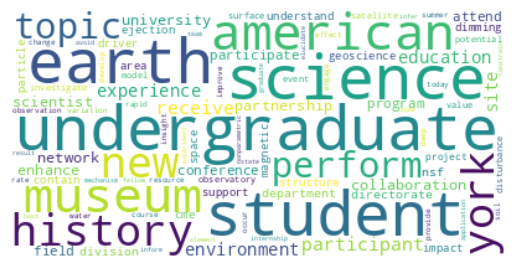

In [ ]:
# Appending all the words in the vocabulary to match the input format of the wordcloud module
vocabulary = ' '.join(vocabulary_).lower()

# Create the wordcloud object
wordcloud = WordCloud(stopwords = all_stopwords,
                      collocations=True,
                      background_color='white'
                      ).generate(vocabulary)

# Plot the wordcloud object using matplotlib
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

### TF-IDF

#### Entire Dataset - both years

In [ ]:
tfidf_vect = TfidfVectorizer(lowercase=True, stop_words=all_stopwords)

# Creating sparse DTM
awards_TFIDF = tfidf_vect.fit_transform(awards['Abstract'])

# Storing the DTM in pandas dataframe
awards_TFIDF = pd.DataFrame(awards_TFIDF.toarray())

# Setting the column/feature names as document terms
awards_TFIDF.columns = tfidf_vect.get_feature_names_out()

awards_TFIDF

,aa,aaai,aaas,aacus,aamas,aar,aaron,aarp,aas,aasaans,...,zplane,zplanes,zpolarized,zr,zrbased,zworski,zürich,µm,école,études
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
freqList = awards_DTM.sum(axis=0)

len(freqList)

24986

In [ ]:
# Summarize word importance from the new TF-IDF DTM by summing
# the TF-IDF values for that word across all documents.
tfidfList = awards_TFIDF.sum(axis=0)
tfidfList

,0
aa,0.211474
aaai,1.322393
aaas,0.219745
aacus,0.122627
aamas,0.437806
...,...
zworski,0.066185
zürich,0.049497
µm,0.323449
école,0.043703


In [ ]:
compare_DF = pd.concat([freqList, tfidfList], axis=1)
compare_DF.columns = ["Frequency", "TF-IDF"]
compare_DF

,Frequency,TF-IDF
aa,3,0.211474
aaai,16,1.322393
aaas,3,0.219745
aacus,2,0.122627
aamas,5,0.437806
...,...,...
zworski,1,0.066185
zürich,1,0.049497
µm,5,0.323449
école,1,0.043703


In [ ]:
compare_sorted = compare_DF.sort_values(by="TF-IDF", ascending=False)

In [ ]:
compare_sorted
# This work on the TF-IDF is very very helpful! It looks like I still have some data cleaning to do, see "br" and "ha"

,Frequency,TF-IDF
project,6545,76.212543
research,5773,73.141165
student,3292,51.742697
br,4672,49.770667
data,2288,45.705010
...,...,...
adaptdeliver,1,0.023746
waterloving,1,0.023746
waterhating,1,0.023746
drugs,1,0.023746


In [ ]:
# split processed data by year for TF-IDF comparison
awards['Year'] = pd.to_numeric(awards['Year'], errors='coerce')

awards_2024 = awards[awards['Year'] == 24]
awards_2025 = awards[awards['Year'] == 25]

/tmp/ipython-input-47-2251930484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awards['Year'] = pd.to_numeric(awards['Year'], errors='coerce')


#### TF-IDF by Year

In [ ]:
vectorizer_2024 = TfidfVectorizer(stop_words=all_stopwords, lowercase=True)
tfidf_2024 = vectorizer_2024.fit_transform(awards_2024['Abstract'].fillna(''))
terms_2024 = vectorizer_2024.get_feature_names_out()
df_2024 = pd.DataFrame(tfidf_2024.toarray(), columns=terms_2024)

vectorizer_2025 = TfidfVectorizer(stop_words=all_stopwords, lowercase=True)
tfidf_2025 = vectorizer_2025.fit_transform(awards_2025['Abstract'].fillna(''))
terms_2025 = vectorizer_2025.get_feature_names_out()
df_2025 = pd.DataFrame(tfidf_2025.toarray(), columns=terms_2025)

from bs4 import BeautifulSoup

def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

awards_2024['Abstract'] = awards_2024['Abstract'].fillna('').apply(clean_html)
awards_2025['Abstract'] = awards_2025['Abstract'].fillna('').apply(clean_html)


In [ ]:
# Compare Means
mean_tfidf_2024 = df_2024.mean().sort_values(ascending=False)
mean_tfidf_2025 = df_2025.mean().sort_values(ascending=False)

compare_by_year = pd.DataFrame({
    'TF-IDF 2024': mean_tfidf_2024,
    'TF-IDF 2025': mean_tfidf_2025
}).fillna(0)

compare_by_year['Abs Difference'] = (compare_by_year['TF-IDF 2025'] - compare_by_year['TF-IDF 2024']).abs()
compare_by_year.sort_values(by='Abs Difference', ascending=False).head(100)

,TF-IDF 2024,TF-IDF 2025,Abs Difference
fellowship,0.000254,0.015508,0.015254
sponsoring,0.000101,0.010536,0.010435
host,0.002992,0.012118,0.009126
student,0.029339,0.021331,0.008008
scientist,0.006998,0.014572,0.007574
...,...,...,...
held,0.002041,0.004163,0.002121
community,0.013662,0.011559,0.002103
curriculum,0.005579,0.003487,0.002091
graph,0.004844,0.006932,0.002089


In [ ]:
# Compare Sums
sum_tfidf_2024 = df_2024.sum().sort_values(ascending=False)
sum_tfidf_2025 = df_2025.sum().sort_values(ascending=False)

compare_by_year = pd.DataFrame({
    'TF-IDF 2024': sum_tfidf_2024,
    'TF-IDF 2025': sum_tfidf_2025
}).fillna(0)

compare_by_year['Abs Difference'] = (compare_by_year['TF-IDF 2025'] - compare_by_year['TF-IDF 2024']).abs()
compare_by_year.sort_values(by='Abs Difference', ascending=False).head(100)

,TF-IDF 2024,TF-IDF 2025,Abs Difference
student,35.940027,16.787247,19.152780
research,45.983134,29.339688,16.643445
project,46.872977,31.506570,15.366407
program,25.343333,13.251704,12.091629
fellowship,0.311690,12.205105,11.893415
...,...,...,...
building,7.583464,3.128649,4.454815
concept,6.865041,2.494421,4.370620
graduate,12.074934,7.754068,4.320866
surface,9.247512,4.944293,4.303218


## Ideas from ChatGPT on how to see if the differences in words across years is significant for the context of the project

---


### ⚖️ Interpreting TF‑IDF Differences in Context
You’ve observed changes in term usage in abstracts (e.g., shifts in the relative importance of words). To assess whether those changes reflect Trump-era policy vs. random fluctuation:

#### 🔹 Consider Contextual Signals:
Term disappearance: Words like “diversity,” “equity,” “inclusion,” “climate,” or “misinformation” dropping sharply may align with documented NSF actions.

Term survival/increase: Science areas unaffected by policy (e.g., pure mathematics) may remain stable.

#### 🔹 Compare with Known Policy Effects:
Cross-reference your top-differing terms with lists of impacted grant topics. If terms suppressed in TF‑IDF match flagged topics (e.g., DEI terms), that strengthens the policy attribution.

#### 🔹 Control for Seasonal Variations:
Analyze prior years (e.g., Jan–Mar 2023 vs. 2024). If variance 2024 vs. 2025 is larger than typical year-over-year changes, it likely reflects the 2025 policy shift.

#### 🔹 Statistical Testing:
Run significance tests (e.g., t-tests or Mann–Whitney U), and check effect sizes. Strong significance + large effect on flagged terms supports a policy-driven change, not random noise.

---

### ✅ Suggested Next Steps
1. Check term lists

Match words in your analysis (especially those with high absolute TF-IDF change) against policy-targeted topics (DEI, climate, misinformation, etc.).

2. Compare to earlier baselines

Calculate TF-IDF differences for 2023–2024 (same period) to gauge typical variation.

3. Quantify signal strength

If magnitude + statistical significance of change for policy-linked terms is substantially higher in 2025 than baseline, policy influence is strongly indicated.

4. Add narrative case studies

Combine data trends with qualitative evidence (grant cancellations, budget actions, executive orders) to bolster your interpretation.

---

## Calvin's idea for visualizations

### Make a line graph of the variances from year to year and admin to admin

---

# Better Idea on comparing variances...

### ✅ Option 1: Kruskal–Wallis test (non-parametric)
Use if your TF-IDF differences are not normally distributed.

Compares the distributions (medians) across more than two groups.

Follow-up: If significant, do post hoc Dunn tests to identify which groups differ.

### ✅ Option 2: One-way ANOVA (parametric)
Use if your data is roughly normally distributed in each group and variances are homogeneous.

Compares the means across groups.

Follow-up: Tukey’s HSD for pairwise comparisons.

### 🔍 Check assumptions first
Plot histograms or Q-Q plots of tfidf_diff by group.

Use shapiro.test() for normality (sample size matters here—large samples can make this too sensitive).

Use leveneTest() for homogeneity of variances.

### Summary

If your TF-IDF differences look skewed or not normal → Kruskal–Wallis.

If your data looks normal and variances are similar → One-way ANOVA.

Follow up with post hoc tests to pinpoint which year-to-year intervals differ.

# Potential problem in comparing money from year to year...is it inflation adjusted???? Probably not. May have to adjust for inflation in "AmountAwardedToDate" variable


TF-IDF scores, if significant differences from year to year, show that researchers were forced to change their wording. Topic modeling *could* show that there were actual differences in topics.


In [ ]:
# NEXT STEPS

# NEXT STEPS

- make pipeline, fix text processing
- pull in other years of NSF data, make the NSF data from this year and last year longer
- find the tf-idf differences
- compare the distributions of the year to year differences and choose a test
- run the appropriate statistical tests
- make graphics

# Pulling in data, adding year variable

In [ ]:
# Pulling in data pipeline and getting basics on it

# want
# jan 21-mar 21 of every year since 2000

import pandas as pd

# 2025 #
awards_2025 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2025.csv", encoding='latin1')

# 2024 #
awards_2025 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2025.csv", encoding='latin1')

# 2023 #
awards_2023 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2023.csv", encoding='latin1')

# 2022
awards_2022 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2022.csv", encoding='latin1')

# 2021
awards_2021 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2021.csv", encoding='latin1')

# 2020
awards_2020 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2020.csv", encoding='latin1')

# 2019
awards_2019 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2019.csv", encoding='latin1')

# 2018
awards_2018 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2018.csv", encoding='latin1')

# 2017
awards_2017 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2017.csv", encoding='latin1')

# 2016
awards_2016 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2016.csv", encoding='latin1')



In [ ]:
# 2015
awards_2015 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2015.csv", encoding='latin1')

# 2014
awards_2014 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2014.csv", encoding='latin1')

# 2013
awards_2013 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2013.csv", encoding='latin1')

# 2012
awards_2012 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2012.csv", encoding='latin1')

# 2011
awards_2011 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2011.csv", encoding='latin1')

# 2010
awards_2010 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2010.csv", encoding='latin1')

# 2009
awards_2009 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2009.csv", encoding='latin1')

# 2008
awards_2008 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2008.csv", encoding='latin1')

# 2007
awards_2007 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2007.csv", encoding='latin1')

# 2006
awards_2006 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2006.csv", encoding='latin1')

# 2005
awards_2005 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2005.csv", encoding='latin1')

# 2004
awards_2004 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2004.csv", encoding='latin1')

# 2003
awards_2003 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2003.csv", encoding='latin1')

# 2002
awards_2002 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2002.csv", encoding='latin1')

# 2001
awards_2001 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2001.csv", encoding='latin1')

# 2000
awards_2000 = pd.read_csv("https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_2000.csv", encoding='latin1')

In [ ]:
# Build pipeline that imports data from year of ranges from github and add a year string variable to each observation for each year, then makes each year its own dataframe
import pandas as pd

def load_awards_data(start_year=2016, end_year=2025):
    awards_data = {}

    base_url = "https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/awards_{}.csv"

    for year in range(start_year, end_year + 1):
        try:
            url = base_url.format(year)
            df = pd.read_csv(url, encoding='latin1')
            df['Year'] = str(year)  # Add year column as string
            awards_data[str(year)] = df
        except Exception as e:
            print(f"❌ Failed to load {year}: {e}")

    return awards_data

def create_yearly_award_variables(awards_data):
    for year, df in awards_data.items():
        globals()[f"awards_{year}"] = df

In [ ]:
# run the import data pipeline
awards_data = load_awards_data(start_year=2016, end_year=2025)
create_yearly_award_variables(awards_data)

# TF-IDF with stemming

In [ ]:
# Step 1: Gather all abstracts
all_abstracts = []
for df in awards_data.values():
    all_abstracts.extend(df['Abstract'].dropna().tolist())

In [ ]:
# build text processing pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re, string, nltk
nltk.download('punkt')

stemmer = PorterStemmer()

# ---- Text Cleaning Helpers ----
def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def collapse_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def stem_text(text):                                                     # NEED TO DECIDE IF STEMMING IS THE RIGHT CHOICE VERSUS LEMMATIZING
    return ' '.join([stemmer.stem(word) for word in text.split()])

# ---- Full Preprocessing Function ----
def preprocess_abstract_column(df, col='Abstract'):
    before = len(df)
    df = df.dropna(subset=[col]).copy()
    after = len(df)
    df[col] = df[col].apply(lambda x: stem_text(
        collapse_whitespace(
            remove_numbers(
                remove_punctuation(
                    clean_html(x)
                )
            )
        )
    ))
    return df, before - after

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Step 2: Clean all abstracts
cleaned_all_abstracts = [stem_text(
    collapse_whitespace(
        remove_numbers(
            remove_punctuation(
                clean_html(text)
            )
        )
    )
) for text in all_abstracts]

# Step 3: Fit the global TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
global_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
global_vectorizer.fit(cleaned_all_abstracts)

TfidfVectorizer(stop_words='english')

In [ ]:
# build tf-idf pipeline

def generate_tfidf_by_year_global(awards_data, col='Abstract', vectorizer=None):
    tfidf_by_year = {}
    drop_count_by_year = {}

    for year, df in awards_data.items():
        cleaned_df, dropped = preprocess_abstract_column(df, col=col)
        drop_count_by_year[year] = dropped

        transformed = vectorizer.transform(cleaned_df[col])
        tfidf_df = pd.DataFrame(transformed.toarray(), columns=vectorizer.get_feature_names_out())
        tfidf_by_year[year] = tfidf_df

    return tfidf_by_year, drop_count_by_year

In [ ]:
#
# Run the pipeline
tfidf_by_year, drops_by_year = generate_tfidf_by_year_global(awards_data, vectorizer=global_vectorizer)

# Example output
print(f"TF-IDF for 2023:\n{tfidf_by_year['2023'].head()}")
print(f"Abstracts dropped in 2023: {drops_by_year['2023']}")

TF-IDF for 2023:
    aa  aaa  aaai  aaaisigai  aabb  aac  aachen  aacr  aacs  aact  ...  étude  \
0  0.0  0.0   0.0        0.0   0.0  0.0     0.0   0.0   0.0   0.0  ...    0.0   
1  0.0  0.0   0.0        0.0   0.0  0.0     0.0   0.0   0.0   0.0  ...    0.0   
2  0.0  0.0   0.0        0.0   0.0  0.0     0.0   0.0   0.0   0.0  ...    0.0   
3  0.0  0.0   0.0        0.0   0.0  0.0     0.0   0.0   0.0   0.0  ...    0.0   
4  0.0  0.0   0.0        0.0   0.0  0.0     0.0   0.0   0.0   0.0  ...    0.0   

   éxito  ìstroke  βhairpin  βreduct   δh   δo   λn  ρabe  ﬁeld  
0    0.0      0.0       0.0      0.0  0.0  0.0  0.0   0.0   0.0  
1    0.0      0.0       0.0      0.0  0.0  0.0  0.0   0.0   0.0  
2    0.0      0.0       0.0      0.0  0.0  0.0  0.0   0.0   0.0  
3    0.0      0.0       0.0      0.0  0.0  0.0  0.0   0.0   0.0  
4    0.0      0.0       0.0      0.0  0.0  0.0  0.0   0.0   0.0  

[5 rows x 59310 columns]
Abstracts dropped in 2023: 0


In [ ]:
print(f"Abstracts dropped: {drops_by_year['2017']}")
# less than ten abstracts dropped each year

Abstracts dropped: 4


In [ ]:
# Year to Year TF-IDF absolute differences in means
def compare_tfidf_year_to_year(tfidf_by_year):
    comparisons = {}
    sorted_years = sorted(tfidf_by_year.keys())  # ensure year order

    for i in range(len(sorted_years) - 1):
        year1 = sorted_years[i]
        year2 = sorted_years[i + 1]

        df1 = tfidf_by_year[year1]
        df2 = tfidf_by_year[year2]

        # Mean TF-IDF for each word in each year
        mean1 = df1.mean()
        mean2 = df2.mean()

        # Align terms and fill missing with 0
        compare_df = pd.DataFrame({
            f'TF-IDF {year1}': mean1,
            f'TF-IDF {year2}': mean2
        }).fillna(0)

        # Calculate absolute difference
        compare_df['Abs Difference'] = (compare_df[f'TF-IDF {year2}'] - compare_df[f'TF-IDF {year1}']).abs()

        # Store result
        comparisons[f'{year1}-{year2}'] = compare_df.sort_values(by='Abs Difference', ascending=False)

    return comparisons

In [ ]:
# run year to year absolute value comparisons function
comparisons_by_year_pair = compare_tfidf_year_to_year(tfidf_by_year)

In [ ]:
# run for one year
# Show top changing terms from 2020 to 2021
comparisons_by_year_pair['2020-2021'].head(10)

,TF-IDF 2020,TF-IDF 2021,Abs Difference
fellowship,0.012194,0.000614,0.011580
confer,0.015205,0.004641,0.010565
pandem,0.000383,0.008253,0.007870
covid,0.000516,0.007226,0.006710
sponsor,0.006052,0.000141,0.005911
project,0.037027,0.042257,0.005230
scientist,0.010113,0.005515,0.004598
institut,0.011814,0.007481,0.004333
host,0.007317,0.003113,0.004204
earthquak,0.005096,0.001098,0.003998


In [ ]:
# 🔧 Function: Compare TF-IDF distributions for one year-pair

from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

def test_tfidf_distribution_difference(tfidf_by_year, year1, year2, alpha=0.05): # i should definitely check if 0.05 is the right p-value
    df1 = tfidf_by_year[year1]
    df2 = tfidf_by_year[year2]

    all_terms = set(df1.columns).union(set(df2.columns))
    results = []

    for term in all_terms:
        scores1 = df1[term] if term in df1 else pd.Series([0] * len(df1))
        scores2 = df2[term] if term in df2 else pd.Series([0] * len(df2))

        # Skip if both are mostly 0s
        if scores1.sum() == 0 and scores2.sum() == 0:
            continue

        stat, pval = mannwhitneyu(scores1, scores2, alternative='two-sided')
        results.append((term, stat, pval))

    # Convert to DataFrame
    df_results = pd.DataFrame(results, columns=['term', 'U_statistic', 'p_raw'])

    # Correct for multiple comparisons
    corrected = multipletests(df_results['p_raw'], alpha=alpha, method='holm')
    df_results['p_corrected'] = corrected[1]
    df_results['significant'] = corrected[0]

    return df_results.sort_values('p_corrected')

In [ ]:
# Store all year-pair results
all_term_tests = {}

# Sort years as strings for dictionary access
sorted_years = sorted(tfidf_by_year.keys())  # Should be strings like '2016', '2017', ...

# Loop over consecutive year-pairs
for i in range(len(sorted_years) - 1):
    y1 = sorted_years[i]
    y2 = sorted_years[i + 1]
    label = f"{y1}-{y2}"

    print(f"Running test for {label}...")
    result = test_tfidf_distribution_difference(tfidf_by_year, y1, y2)
    all_term_tests[label] = result

# Testing for this word, is how it was used in 2021 documents significantly different from how it was used in 2020 documents, based on TF-IDF scores?

Running test for 2016-2017...
Running test for 2017-2018...
Running test for 2018-2019...
Running test for 2019-2020...
Running test for 2020-2021...
Running test for 2021-2022...
Running test for 2022-2023...
Running test for 2023-2024...
Running test for 2024-2025...


In [ ]:
# STORE THESE TEST RESULTS THEY TAKE A LONG TIME TO RUN
import pickle

# Save the dictionary to a file
with open("tfidf_mannwhitney_results_2016_2025.pkl", "wb") as f:
    pickle.dump(all_term_tests, f)

print("Results saved to tfidf_mannwhitney_results_2016_2025.pkl")

Results saved to tfidf_mannwhitney_results_2016_2025.pkl


In [ ]:
# STORE THESE TEST RESULTS THEY TAKE A LONG TIME TO RUN

import pandas as pd

# Combine all year-pair results into one DataFrame with a 'Year Pair' column
combined_df = pd.concat(
    [df.assign(**{"Year Pair": yearpair}) for yearpair, df in all_term_tests.items()],
    ignore_index=True
)

# Save to CSV
combined_df.to_csv("tfidf_mannwhitney_results_2016_2025.csv", index=False)

In [ ]:
# Summarize all year pair results

# Build summary stats for each pair of years
summary_stats = []

for pair, df in all_term_tests.items():
    total = len(df)
    significant = df['significant'].sum()
    percent = (significant / total) * 100

    summary_stats.append({
        'Year Pair': pair,
        'Words Tested': total,
        'Significant Words': significant,
        '% Significant': round(percent, 2),
        'Median p (corrected)': df['p_corrected'].median(),
        'Min p (corrected)': df['p_corrected'].min(),
        'Max p (corrected)': df['p_corrected'].max(),
    })

yearpair_summary = pd.DataFrame(summary_stats).sort_values('Year Pair')

yearpair_summary

,Year Pair,Words Tested,Significant Words,% Significant,Median p (corrected),Min p (corrected),Max p (corrected)
0,2016-2017,23990,6,0.03,1.0,4.670178e-05,1.0
1,2017-2018,22126,24,0.11,1.0,0.000000e+00,1.0
2,2018-2019,23372,20,0.09,1.0,1.141029e-09,1.0
3,2019-2020,25521,8,0.03,1.0,2.036514e-13,1.0
4,2020-2021,24499,17,0.07,1.0,5.042623e-17,1.0
5,2021-2022,24186,14,0.06,1.0,1.730731e-46,1.0
6,2022-2023,23186,15,0.06,1.0,3.312622e-37,1.0
7,2023-2024,22626,6,0.03,1.0,3.195754e-04,1.0
8,2024-2025,19663,16,0.08,1.0,8.375957e-18,1.0


In [ ]:
most_volatile_years = yearpair_summary.sort_values('% Significant', ascending=False)
most_volatile_years

,Year Pair,Words Tested,Significant Words,% Significant,Median p (corrected),Min p (corrected),Max p (corrected)
1,2017-2018,22126,24,0.11,1.0,0.000000e+00,1.0
2,2018-2019,23372,20,0.09,1.0,1.141029e-09,1.0
8,2024-2025,19663,16,0.08,1.0,8.375957e-18,1.0
4,2020-2021,24499,17,0.07,1.0,5.042623e-17,1.0
6,2022-2023,23186,15,0.06,1.0,3.312622e-37,1.0
5,2021-2022,24186,14,0.06,1.0,1.730731e-46,1.0
0,2016-2017,23990,6,0.03,1.0,4.670178e-05,1.0
3,2019-2020,25521,8,0.03,1.0,2.036514e-13,1.0
7,2023-2024,22626,6,0.03,1.0,3.195754e-04,1.0


/tmp/ipython-input-27-905109125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_volatile_years, x='Year Pair', y='% Significant', palette='magma')


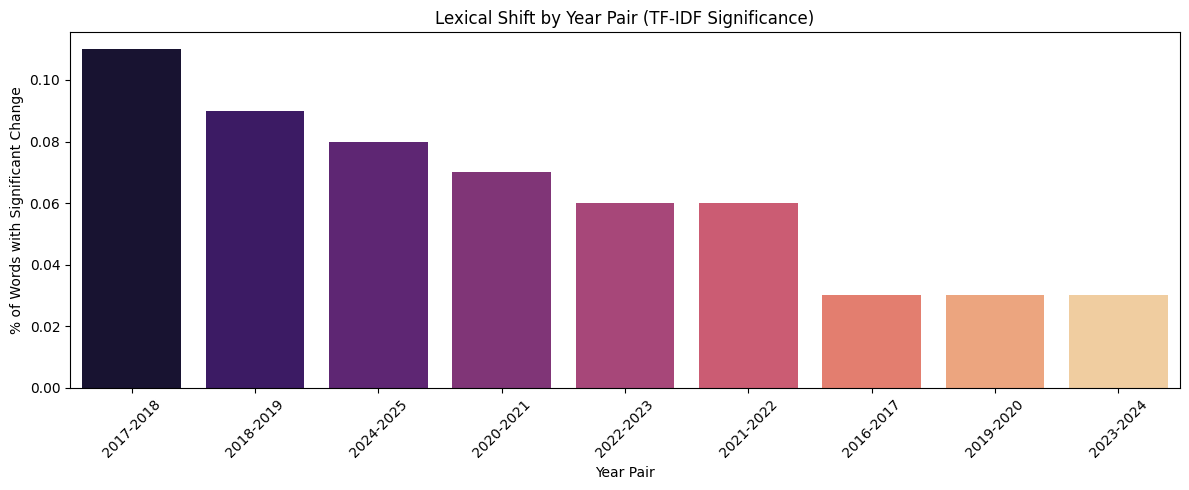

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 5))
sns.barplot(data=most_volatile_years, x='Year Pair', y='% Significant', palette='magma')
plt.title('Lexical Shift by Year Pair (TF-IDF Significance)')
plt.ylabel('% of Words with Significant Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# identify the words that drove the biggest shift in the 2024-2025 year-pair.

# Set the year-pair of interest
top_yearpair = '2024-2025'
print(f"Most lexical shift occurred in: {top_yearpair}")

# Pull the full test results for that year-pair
top_df = all_term_tests[top_yearpair].copy()

# Filter to significant words only
sig_words_df = top_df[top_df['significant'] == True]

# Sort and display the top 20 by lowest p-value
top_words = sig_words_df.sort_values('p_corrected').head(20)
top_words[['term', 'p_corrected', 'U_statistic']]

Most lexical shift occurred in: 2024-2025


,term,p_corrected,U_statistic
12679,underrepres,8.375957e-18,710263.5
4382,fellowship,2.147338e-10,586333.0
15459,fy,3.491740e-10,591357.0
13002,sponsor,5.265201e-09,586697.0
1562,engin,6.197746e-07,694118.5
16750,divers,6.980637e-07,691300.0
3404,minor,4.505183e-06,655775.0
1638,inclus,4.933098e-05,654276.0
18037,titl,5.269066e-05,592098.0
15762,nation,7.551679e-05,678576.0


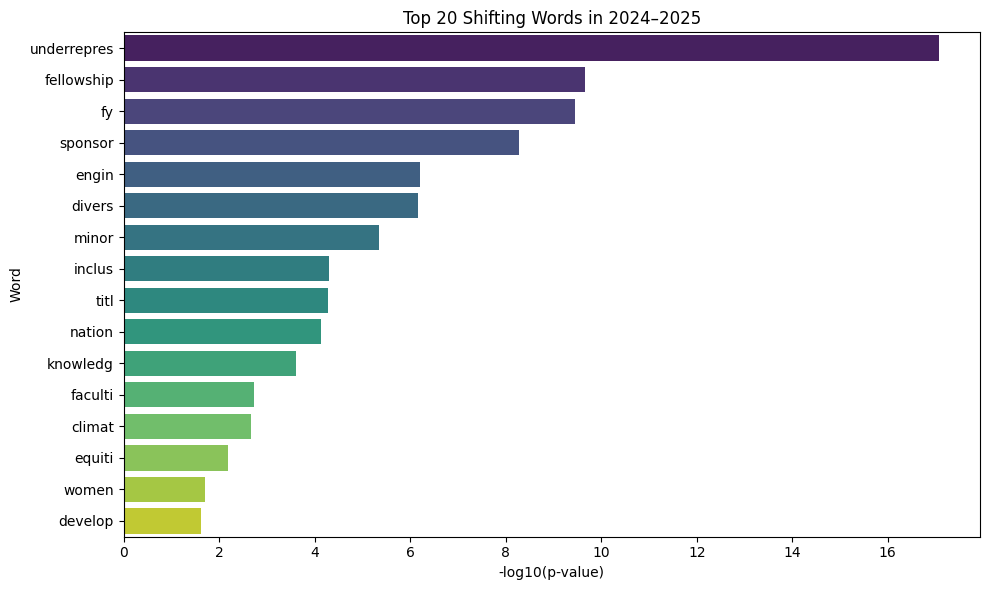

In [ ]:
import numpy as np

# Convert p-values to -log10(p)
top_words['-log10(p)'] = -np.log10(top_words['p_corrected'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_words, y='term', x='-log10(p)', palette='viridis')
plt.title('Top 20 Shifting Words in 2024–2025')
plt.xlabel('-log10(p-value)')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [ ]:
## NOTE I think it is worth see what these look with lemmatization corrected for plurals

In [ ]:
# Now Testing Variance in Lexical Change Across Year-Pairs

In [ ]:
# kruskal wallis test for anova versus levene
from scipy.stats import kruskal

grouped_Ustats = [df['U_statistic'] for df in all_term_tests.values()]
stat, p = kruskal(*grouped_Ustats)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

Kruskal-Wallis test statistic: 206554.82746976858, p-value: 0.0


In [ ]:
# levene Variance in change across years
from scipy.stats import levene

# Example: Compare variance of U-statistics for each year-pair
levene_result = levene(*[df['U_statistic'].values for df in all_term_tests.values()])
print(levene_result)

LeveneResult(statistic=np.float64(25.38040852997929), pvalue=np.float64(1.528557548892586e-39))


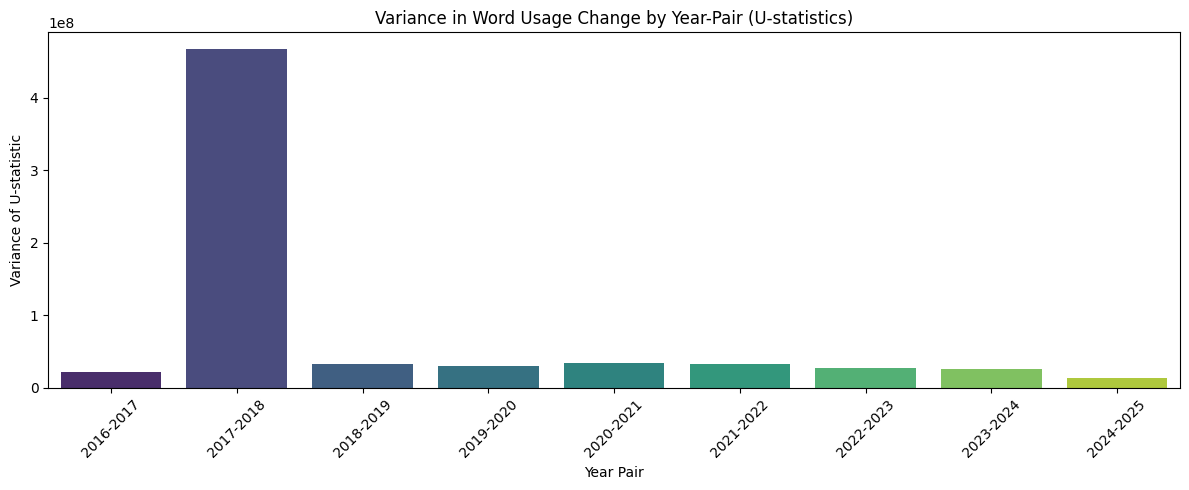

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect variance of U-statistics per year-pair
variance_df = pd.DataFrame([
    {
        'Year Pair': year_pair,
        'U_stat_variance': df['U_statistic'].var()
    }
    for year_pair, df in all_term_tests.items()
])

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=variance_df, x='Year Pair', y='U_stat_variance', palette='viridis')
plt.title('Variance in Word Usage Change by Year-Pair (U-statistics)')
plt.ylabel('Variance of U-statistic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

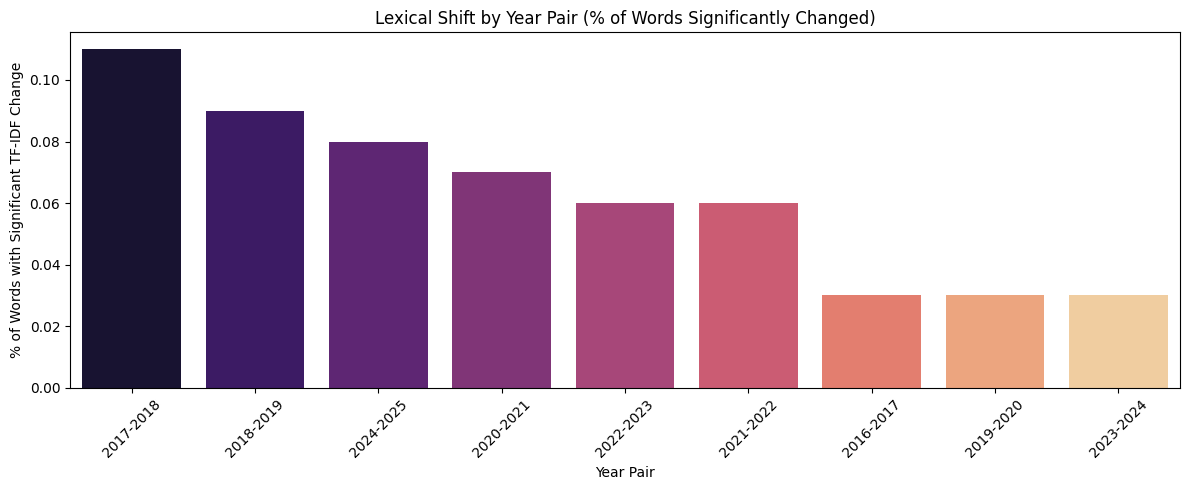

In [ ]:
# Assumes you already calculated most_volatile_years with "% Significant"
plt.figure(figsize=(12, 5))
sns.barplot(data=most_volatile_years, x='Year Pair', y='% Significant', palette='magma')
plt.title('Lexical Shift by Year Pair (% of Words Significantly Changed)')
plt.ylabel('% of Words with Significant TF-IDF Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## NOTE TF-IDF score comparison leaves out context, which is why we whould check for semantic meaning and then test all the differences

# Work between 7 p.m. and 8 p.m.

In [ ]:
sig_terms_2023_2024 = all_term_tests['2023-2024'].query("significant == True")
sig_terms_2023_2024

In [ ]:
sig_terms_2024_2025 = all_term_tests['2024-2025'].query("significant == True")
sig_terms_2024_2025

In [ ]:
# Barplot — Number of Significantly Changing Words per Year-Pair
import matplotlib.pyplot as plt
import seaborn as sns

# Count significant words for each year-pair
sig_counts = {
    pair: df['significant'].sum()
    for pair, df in all_term_tests.items()
}

# Turn into a dataframe for plotting
sig_df = pd.DataFrame.from_dict(sig_counts, orient='index', columns=['Significant Terms'])
sig_df = sig_df.reset_index().rename(columns={'index': 'Year Pair'})

# Sort by year-pair order (optional)
sig_df['StartYear'] = sig_df['Year Pair'].apply(lambda x: int(x.split('-')[0]))
sig_df = sig_df.sort_values('StartYear')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=sig_df, x='Year Pair', y='Significant Terms', palette='magma')
plt.xticks(rotation=45)
plt.title('Number of Words with Significant TF-IDF Shifts (Mann–Whitney)')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()

In [ ]:
#  heatmap to visualize term usage significance across year-pairs.

from collections import Counter
import numpy as np

# Count how often each word was flagged as significant
sig_counter = Counter()

for pair_df in all_term_tests.values():
    sig_words = pair_df[pair_df['significant']]['term']
    sig_counter.update(sig_words)

# Select top N most frequently significant words
top_words = [word for word, _ in sig_counter.most_common(20)]

# Create a heatmap data matrix
heatmap_data = pd.DataFrame(index=top_words)

for pair, df in all_term_tests.items():
    sub_df = df[df['term'].isin(top_words)].copy()
    sub_df = sub_df.set_index('term')

    # Use -log10(p_corrected) for heatmap intensity
    # Or 1 = significant, 0 = not
    col = f'{pair}'
    heatmap_data[col] = -np.log10(sub_df['p_corrected'])  # <- swap with binary if preferred

# Fill missing values (if a word wasn't tested in that year-pair)
heatmap_data = heatmap_data.fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=False, cmap='coolwarm', linewidths=0.5,
            cbar_kws={'label': '-log10(corrected p-value)'})
plt.title('Significant TF-IDF Shifts by Word and Year-Pair')
plt.xlabel('Year Pair')
plt.ylabel('Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Work before 7 p.m. on July 22

In [ ]:
# now work on statistical tests, then visualizations

In [ ]:
# lets start by checking the distributions of the year to year differences

In [ ]:
def batch_check_tfidf_normality(comparisons_by_year_pair, alpha=0.05):
    results = {}

    for year_pair, df in comparisons_by_year_pair.items():
        diffs = df['Abs Difference']

        # Skip small samples to avoid Shapiro warning
        if len(diffs) < 3:
            results[year_pair] = 'Too few values'
            continue

        # Shapiro-Wilk test
        stat, p = stats.shapiro(diffs)
        results[year_pair] = {
            'p-value': p,
            'normal?': 'No' if p < alpha else 'Yes'
        }

        if p < alpha:
            print(f"❌ {year_pair}: NOT normal (p = {p:.4f})")
        else:
            print(f"✅ {year_pair}: Possibly normal (p = {p:.4f})")

    return results

In [ ]:
normality_results = batch_check_tfidf_normality(comparisons_by_year_pair)

❌ 2016-2017: NOT normal (p = 0.0000)
❌ 2017-2018: NOT normal (p = 0.0000)
❌ 2018-2019: NOT normal (p = 0.0000)
❌ 2019-2020: NOT normal (p = 0.0000)
❌ 2020-2021: NOT normal (p = 0.0000)
❌ 2021-2022: NOT normal (p = 0.0000)
❌ 2022-2023: NOT normal (p = 0.0000)
❌ 2023-2024: NOT normal (p = 0.0000)
❌ 2024-2025: NOT normal (p = 0.0000)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25521.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24499.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24186.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23186.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.

In [ ]:
# now lets visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_all_tfidf_difference_distributions(comparisons_by_year_pair, bins=30):
    num_plots = len(comparisons_by_year_pair)
    cols = 3
    rows = math.ceil(num_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3.5))
    axes = axes.flatten()

    for idx, (year_pair, df) in enumerate(comparisons_by_year_pair.items()):
        sns.histplot(df['Abs Difference'], bins=bins, kde=True, ax=axes[idx], color='steelblue')
        axes[idx].set_title(f"{year_pair}")
        axes[idx].set_xlabel("Abs Difference")
        axes[idx].set_ylabel("Count")

    # Remove empty subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

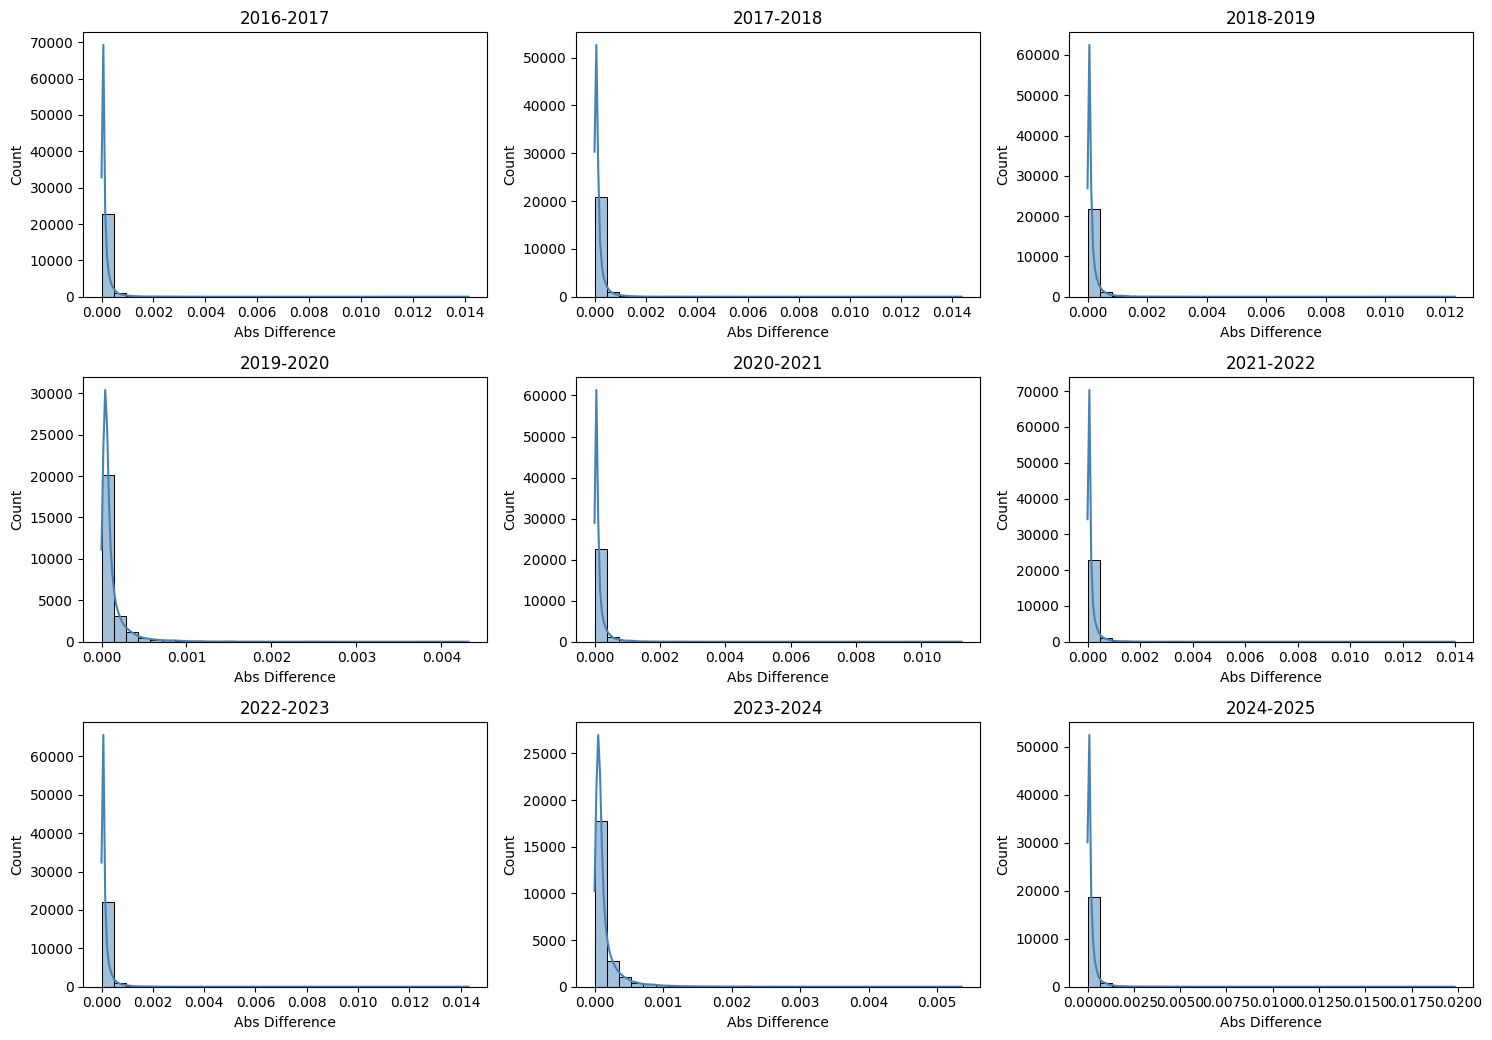

In [ ]:
plot_all_tfidf_difference_distributions(comparisons_by_year_pair)

In [ ]:
# So, we run kruskal wallis test that is non parametric
from scipy.stats import kruskal

def run_kruskal_test_on_year_pairs(comparisons_by_year_pair):
    all_groups = []
    labels = []

    for year_pair, df in comparisons_by_year_pair.items():
        diffs = df['Abs Difference'].values
        all_groups.append(diffs)
        labels.append(year_pair)

    stat, p = kruskal(*all_groups)

    print(f"Kruskal–Wallis H-statistic = {stat:.4f}")
    print(f"p-value = {p:.4e}")

    if p < 0.05:
        print("❗ Statistically significant differences exist between year-to-year TF-IDF distributions.")
    else:
        print("✅ No statistically significant differences detected between year-to-year TF-IDF distributions.")

    return stat, p


In [ ]:
kruskal_stat, kruskal_p = run_kruskal_test_on_year_pairs(comparisons_by_year_pair)

Kruskal–Wallis H-statistic = 3066.5972
p-value = 0.0000e+00
❗ Statistically significant differences exist between year-to-year TF-IDF distributions.


In [ ]:
# So, no we run pairwise tests
def run_mannwhitney_consecutive_only(comparisons_by_year_pair, alpha=0.05):
    sorted_pairs = sorted(comparisons_by_year_pair.keys())  # Ensure order
    results = []

    for i in range(len(sorted_pairs) - 1):
        pair1 = sorted_pairs[i]
        pair2 = sorted_pairs[i + 1]

        data1 = comparisons_by_year_pair[pair1]['Abs Difference']
        data2 = comparisons_by_year_pair[pair2]['Abs Difference']

        stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
        results.append((pair1, pair2, p, stat))

    # Convert to DataFrame
    df = pd.DataFrame(results, columns=['YearPair1', 'YearPair2', 'p_raw', 'U_statistic'])

    # Multiple testing correction
    corrected = multipletests(df['p_raw'], alpha=alpha, method='holm')
    df['p_corrected'] = corrected[1]
    df['significant'] = corrected[0]

    return df.sort_values(by='p_corrected')



In [ ]:
consecutive_results = run_mannwhitney_consecutive_only(comparisons_by_year_pair)

# Show significant ones
consecutive_results[consecutive_results['significant'] == True]


,YearPair1,YearPair2,p_raw,U_statistic,p_corrected,significant
7,2023-2024,2024-2025,4.131636e-137,191239419.5,3.305309e-136,True
2,2018-2019,2019-2020,5.135822e-81,327956618.5,3.595076e-80,True
0,2016-2017,2017-2018,7.963774e-29,249489815.5,4.778264e-28,True
3,2019-2020,2020-2021,9.072055e-24,296392866.5,4.536027e-23,True
1,2017-2018,2018-2019,2.890649e-18,270768657.5,1.156260e-17,True
6,2022-2023,2023-2024,3.568192e-14,251581825.5,1.070458e-13,True
5,2021-2022,2022-2023,3.068172e-12,270010936.5,6.136343e-12,True


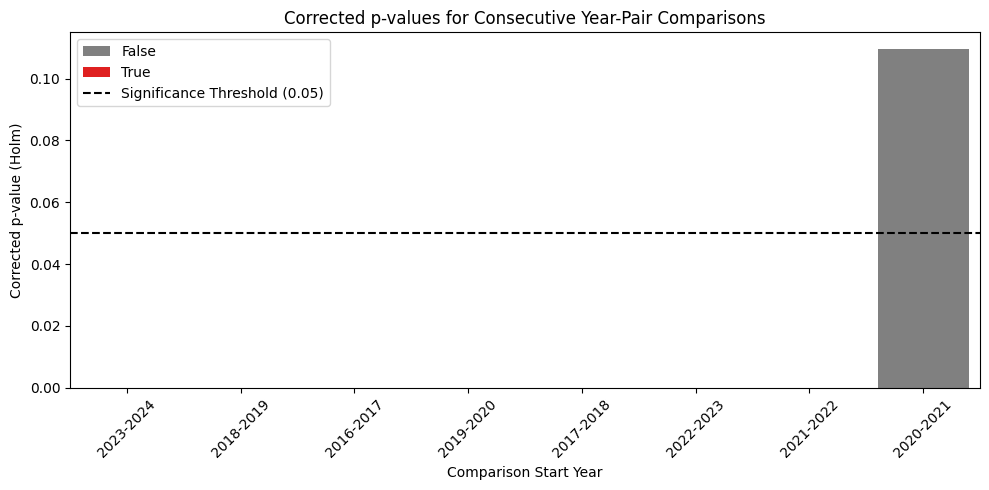

In [ ]:
# Some visualizations
import seaborn as sns
import matplotlib.pyplot as plt

def plot_consecutive_pvalues(results_df):
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x='YearPair1', y='p_corrected', hue='significant',
        data=results_df, dodge=False, palette={True: 'red', False: 'gray'}
    )
    plt.axhline(0.05, ls='--', color='black', label='Significance Threshold (0.05)')
    plt.title("Corrected p-values for Consecutive Year-Pair Comparisons")
    plt.ylabel("Corrected p-value (Holm)")
    plt.xlabel("Comparison Start Year")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_consecutive_pvalues(consecutive_results)


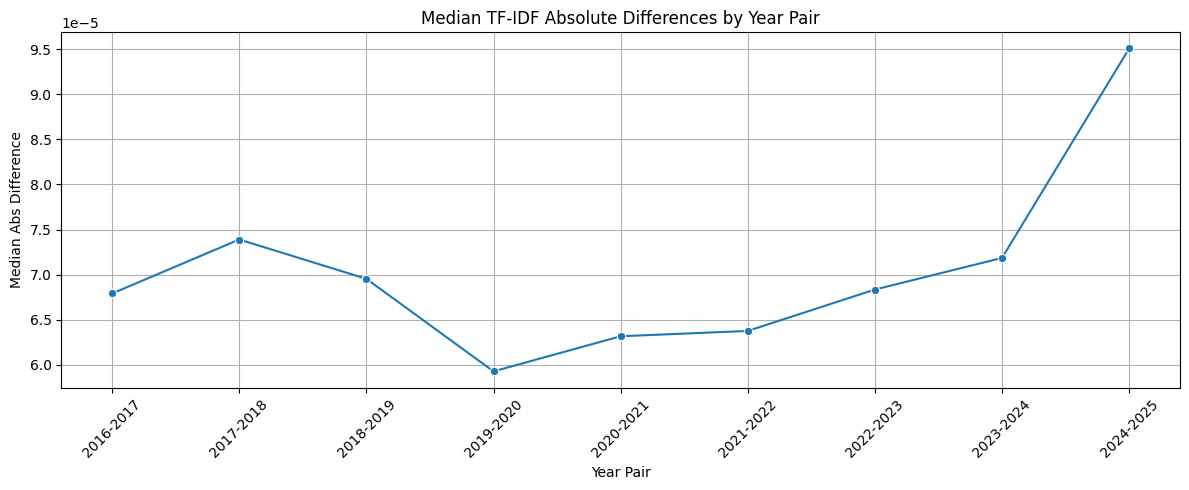

In [ ]:
def plot_median_tfidf_change(comparisons_by_year_pair):
    years = []
    medians = []

    for pair, df in comparisons_by_year_pair.items():
        years.append(pair)
        medians.append(df['Abs Difference'].median())

    plt.figure(figsize=(12, 5))
    sns.lineplot(x=years, y=medians, marker='o')
    plt.title("Median TF-IDF Absolute Differences by Year Pair")
    plt.ylabel("Median Abs Difference")
    plt.xlabel("Year Pair")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_median_tfidf_change(comparisons_by_year_pair)


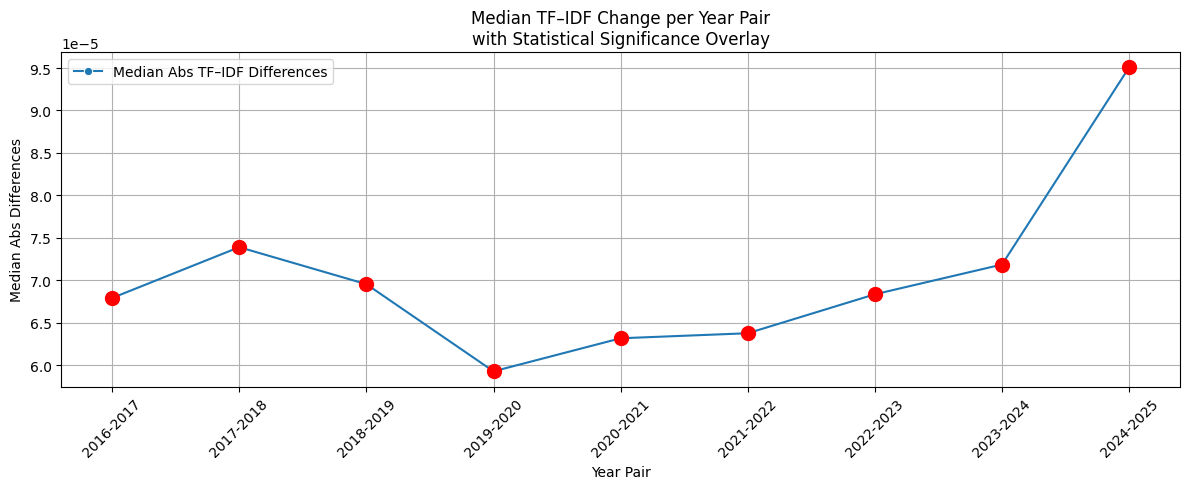

In [ ]:
def plot_median_tfidf_change_with_significance(comparisons_by_year_pair, significance_df):
    years = []
    median_diffs = []
    sig_flags = []

    for pair, df in comparisons_by_year_pair.items():
        years.append(pair)
        median_diffs.append(df['Abs Difference'].median())

        # Check if this pair is significant
        is_sig = False
        for _, row in significance_df.iterrows():
            if row['YearPair1'] == pair or row['YearPair2'] == pair:
                is_sig = row['significant']
                break
        sig_flags.append(is_sig)

    # Plot
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=years, y=median_diffs, marker='o', label="Median Abs TF–IDF Differences")

    for i, sig in enumerate(sig_flags):
        color = 'red' if sig else 'gray'
        plt.scatter(years[i], median_diffs[i], color=color, s=100, zorder=5)

    plt.title("Median TF–IDF Change per Year Pair\nwith Statistical Significance Overlay")
    plt.ylabel("Median Abs Differences")
    plt.xlabel("Year Pair")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_median_tfidf_change_with_significance(comparisons_by_year_pair, consecutive_results)

# this shows differences in year to year changes with significance
# basically this shows the consecutive mann whitney tests